# Introduction

The Indian Premier League mostly known as IPL, is an Men's Twenty twenty cricket League founded in 2008, and held annually 
during March to May in India. The IPL is very popular among the cricket fans and youngsters. The total brand value of IPL in
2022 was Rs.90,038 and also it also have contributed to the GDP of the country (Source - wikipedia).

It is important to analyze the performance of each player and teams in IPL. Here we utlize the power of python to perform the exploratory data analysis to identify the most successful teams, players and most importantly to isolate the factors that have contributed to the win or loss of each team. Also this analysis aimed to suggest the players or teams that can help a company to endorse them for their products. 

A total of 2 datasets (deliveries.csv and matches.csv) were used in this analysis. The deliveries and matches datasets have different features.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
import plotly.io as pio
pio.renderers.default = "svg"

In [4]:
dfd=pd.read_csv("deliveries.csv")

In [5]:
dfd.head(100)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [6]:
dfd.shape

(179078, 21)

In [7]:
dfd.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
dfd.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
dfd.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
dfd["player_dismissed"].value_counts()

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
             ... 
S Randiv        1
R Ninan         1
B Sumanth       1
C Madan         1
S Singh         1
Name: player_dismissed, Length: 487, dtype: int64

In [12]:
dfm=pd.read_csv("matches.csv")

In [13]:
dfm.head(40)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [14]:
dfm.shape

(756, 18)

In [15]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [16]:
dfm.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [17]:
dfm.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [18]:
dfm['umpire3'].unique()

array([nan, 'Anil Chaudhary', 'Nitin Menon', 'S Ravi', 'O Nandan',
       'A Nanda Kishore', 'Vineet Kulkarni', 'C Shamshuddin',
       'Rod Tucker', 'Chris Gaffaney', 'A.D Deshmukh', 'Nigel Llong',
       'K Ananthapadmanabhan', 'Anil Dandekar', 'Virender Kumar Sharma',
       'Yeshwant Barde', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'KN Anantapadmanabhan', 'Ulhas Gandhe',
       'Nanda Kishore', 'Ian Gould', 'Sundaram Ravi',
       'KN Ananthapadmanabhan', 'Chettithody Shamshuddin'], dtype=object)

In [19]:
dfd["inning"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [20]:
dfd['total_runs'].unique()

array([ 0,  4,  2,  1,  6,  3,  5,  7, 10,  8], dtype=int64)

In [21]:
dfd['total_runs'].sum()

235290

In [22]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


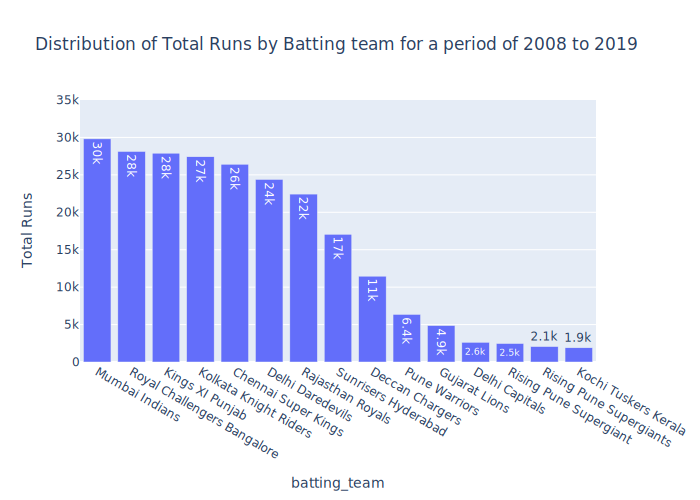

In [23]:
dept_att=dfd.groupby(['batting_team']).apply(lambda x:x['total_runs'].sum()).reset_index(name='Total Runs').sort_values(by="Total Runs", ascending=False)
figuy=px.bar(dept_att,x='batting_team',y='Total Runs',text_auto='.2s',title='Distribution of Total Runs by Batting team for a period of 2008 to 2019')
figuy.update_layout(yaxis_range=[0,35000])
figuy.show()

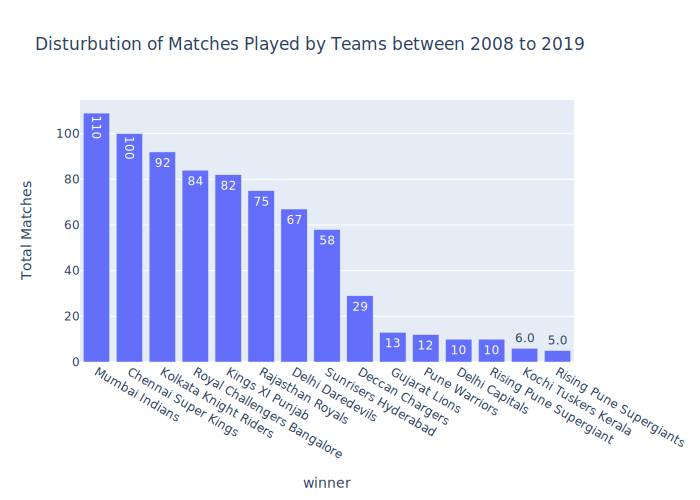

In [24]:
data_match=dfm.groupby(["winner"]).apply(lambda x:x["winner"].count()).reset_index(name="Total Matches").sort_values(by="Total Matches",ascending=False)
fig=px.bar(data_match,x="winner",y="Total Matches",text_auto='.2s',title="Disturbution of Matches Played by Teams between 2008 to 2019")
fig.show()

In [25]:
dfd['match_id'].value_counts().sort_values()

11340     51
301       63
452      100
568      106
120      108
        ... 
388      261
476      262
534      262
34       263
126      267
Name: match_id, Length: 756, dtype: int64

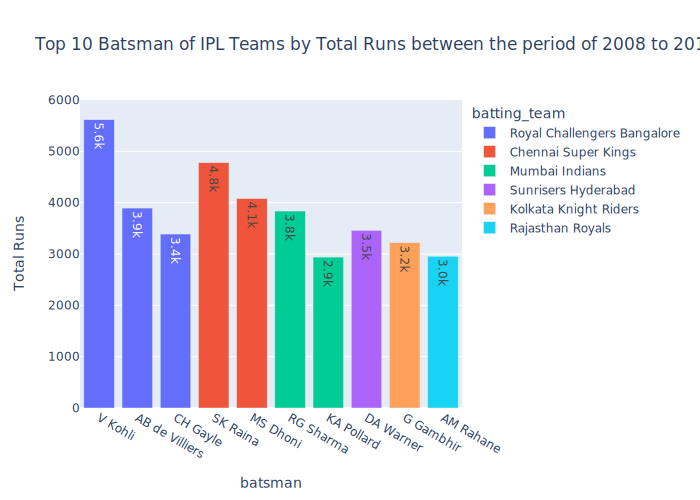

In [26]:
data_batsman=dfd.groupby(["batsman","batting_team"]).apply(lambda x:x["total_runs"].sum()).reset_index(name="Total Runs").sort_values(by="Total Runs",ascending=False).head(10)
figu=px.bar(data_batsman,x="batsman",y="Total Runs",color="batting_team",text_auto=".2s",title="Top 10 Batsman of IPL Teams by Total Runs between the period of 2008 to 2019")
figu.update_layout(yaxis_range=[0,6000])
figu.show()

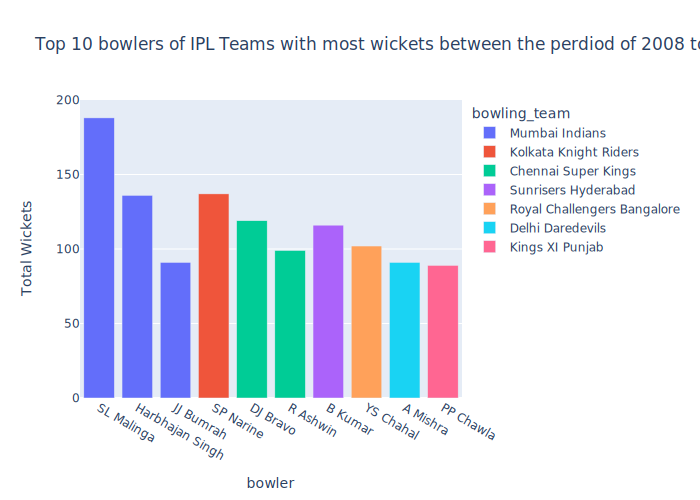

In [27]:
data_bowl=dfd.groupby(["bowler","bowling_team"]).apply(lambda x:x["player_dismissed"].count()).reset_index(name="Total Wickets").sort_values(by="Total Wickets",ascending=False).head(10)
figud=px.bar(data_bowl,x="bowler",y="Total Wickets",color="bowling_team",title="Top 10 bowlers of IPL Teams with most wickets between the perdiod of 2008 to 2019")
figud.update_layout(yaxis_range=[0,200])
figud.show()

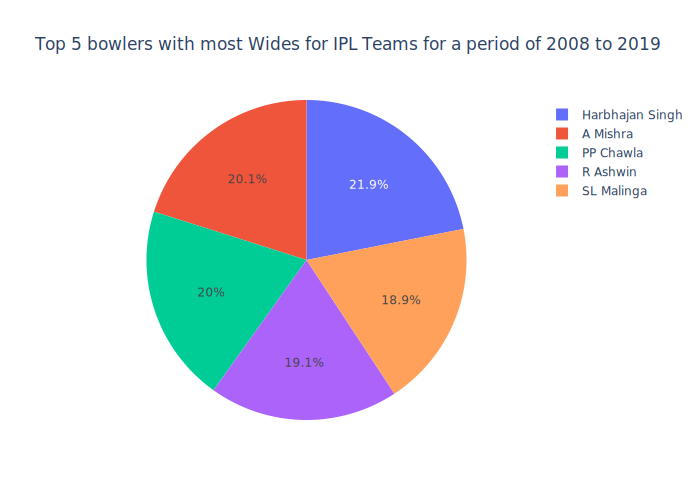

In [28]:
data_wide=dfd.groupby(['bowler']).apply(lambda x:x['wide_runs'].count()).reset_index(name="Most Wides").sort_values(by="Most Wides",ascending=False).head(5)
fig_wid=px.pie(data_wide,values="Most Wides",names="bowler",title="Top 5 bowlers with most Wides for IPL Teams for a period of 2008 to 2019")
fig_wid.show()

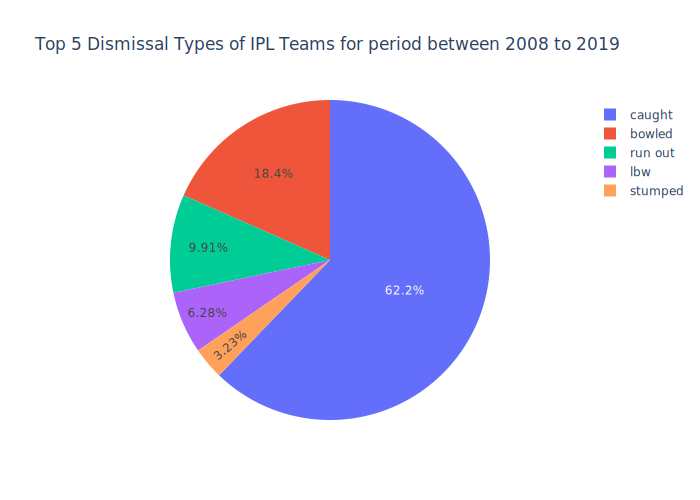

In [29]:
data_dism=dfd.groupby(['dismissal_kind']).apply(lambda x:x['dismissal_kind'].count()).reset_index(name="Top 5 Dismissal Type").sort_values(by="Top 5 Dismissal Type",ascending=False).head(5)
fig_dism=px.pie(data_dism,values="Top 5 Dismissal Type",names="dismissal_kind",title="Top 5 Dismissal Types of IPL Teams for  period between 2008 to 2019")
fig_dism.show()

In [30]:
dfd["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

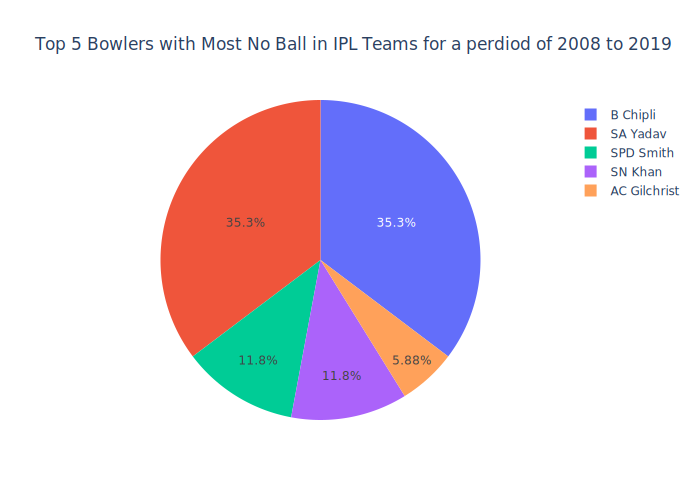

In [31]:
data_noball=dfd.groupby(['bowler']).apply(lambda x:x['noball_runs'].count()).reset_index(name="Top 5 Bowlers with Most No Balls").sort_values(by="Top 5 Bowlers with Most No Balls").head(5)
fig_noball=px.pie(data_noball,values="Top 5 Bowlers with Most No Balls",names="bowler",title="Top 5 Bowlers with Most No Ball in IPL Teams for a perdiod of 2008 to 2019")
fig_noball.show()

In [32]:
dfm["date"]=dfm["date"].apply(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))

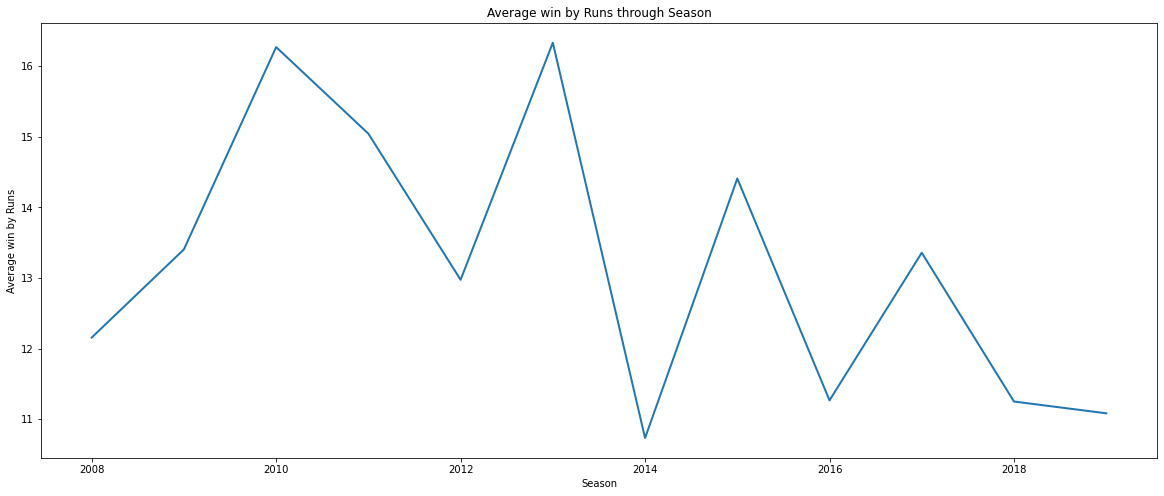

In [33]:
plt.figure(figsize=(20,8))
axx =sns.lineplot(x="season",y="win_by_runs",data=dfm,ci=None,palette="YlGnBu_r",lw=2)
axx.set(xlabel="Season",ylabel="Average win by Runs",title="Average win by Runs through Season")
plt.show()

In [34]:
dfm

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


[Text(0.5, 0, 'season'),
 Text(0, 0.5, 'Average win by Runs'),
 Text(0.5, 1.0, 'Average win by Runs with Season and Teams')]

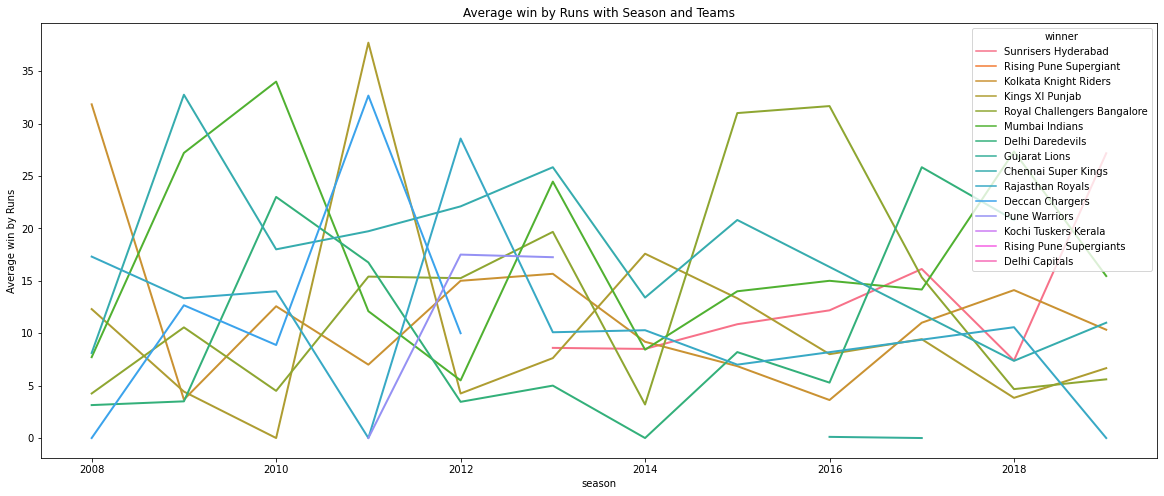

In [35]:
plt.figure(figsize=(20,8))
axy=sns.lineplot(x="season",y="win_by_runs",hue="winner",data=dfm,ci=None,lw=2)
axy.set(xlabel="season",ylabel="Average win by Runs",title="Average win by Runs with Season and Teams")

In [36]:
import squarify

In [37]:
ndf=dfm.groupby('winner')[['win_by_runs']].mean().sort_values(by="win_by_runs",ascending=False)

In [38]:
ndf

,win_by_runs
winner,
Chennai Super Kings,17.780000
Mumbai Indians,17.119266
Royal Challengers Bangalore,14.904762
Deccan Chargers,14.517241
Rising Pune Supergiant,12.300000
Sunrisers Hyderabad,12.293103
Rajasthan Royals,11.933333
Kolkata Knight Riders,11.804348
Pune Warriors,11.583333


In [39]:
win=dfm.groupby('winner')[['win_by_runs']].mean().index.get_level_values(0).tolist()
print(win)

['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [40]:
wbr=dfm.groupby('winner')[['win_by_runs']].mean().reset_index().win_by_runs.values.tolist()
print(wbr)

[17.78, 14.517241379310345, 9.2, 10.074626865671641, 0.07692307692307693, 11.28048780487805, 3.8333333333333335, 11.804347826086957, 17.119266055045873, 11.583333333333334, 11.933333333333334, 12.3, 10.6, 14.904761904761905, 12.293103448275861]


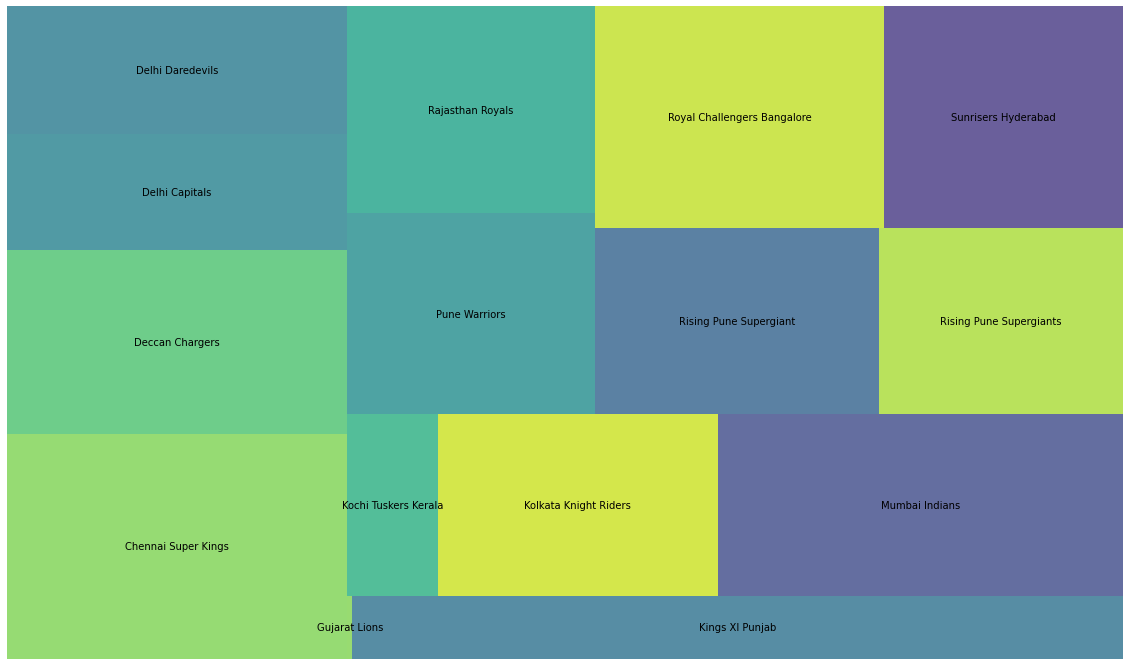

In [41]:
plt.figure(figsize=(20,12))
squarify.plot(sizes=wbr,label=win,alpha=0.8)
plt.axis('off')
plt.show()

In [42]:
df_uc=dfm.copy()

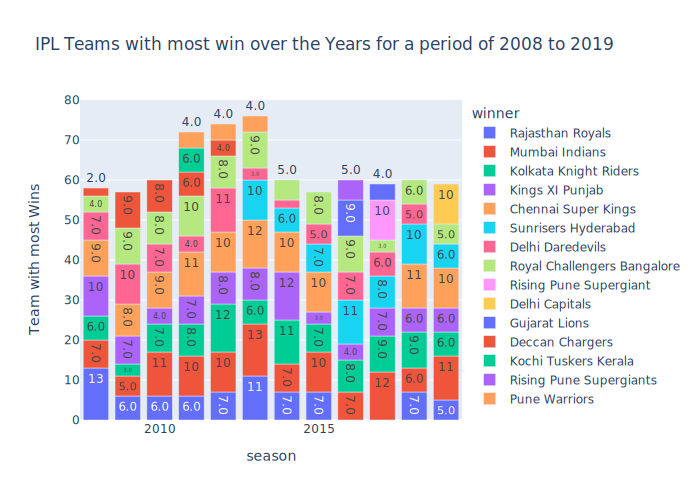

In [43]:
data_twin=dfm.groupby(["winner","season"]).apply(lambda x:x['winner'].count()).reset_index(name="Team with most Wins").sort_values(by="Team with most Wins",ascending=False)
fig_twin=px.bar(data_twin,x="season",y="Team with most Wins",text_auto = '.2s',color = "winner", title="IPL Teams with most win over the Years for a period of 2008 to 2019")
fig_twin.show()

In [44]:
dfm['city'].nunique()

32

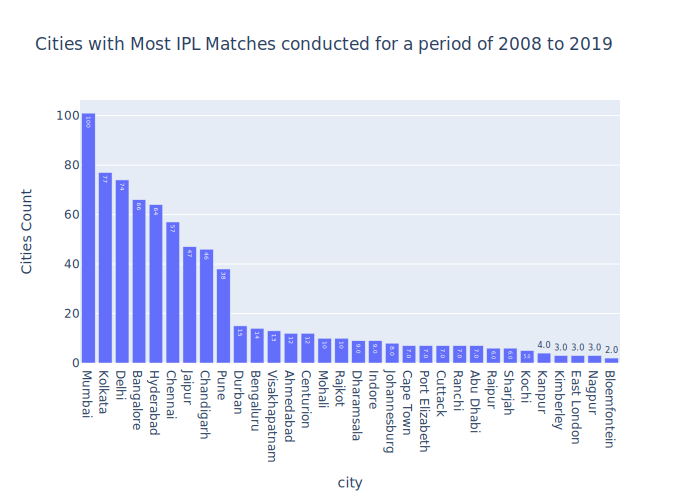

In [45]:
top_city=dfm.groupby(['city']).apply(lambda x:x['city'].count()).reset_index(name="Cities Count").sort_values(by="Cities Count",ascending=False)
fig_topcity=px.bar(top_city,x="city",y="Cities Count",text_auto='.2s',title="Cities with Most IPL Matches conducted for a period of 2008 to 2019")
fig_topcity.show()

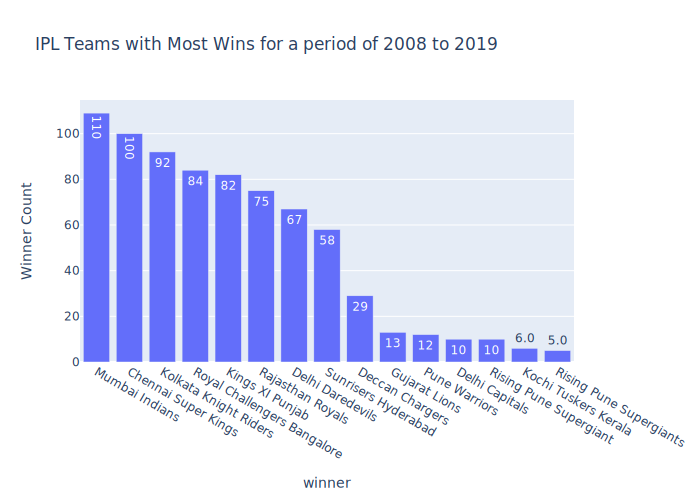

In [46]:
top_team=dfm.groupby(['winner']).apply(lambda x:x['winner'].count()).reset_index(name="Winner Count").sort_values(by="Winner Count",ascending=False)
fig_topcity=px.bar(top_team,x="winner",y="Winner Count",text_auto='.2s',title="IPL Teams with Most Wins for a period of 2008 to 2019")
fig_topcity.show()

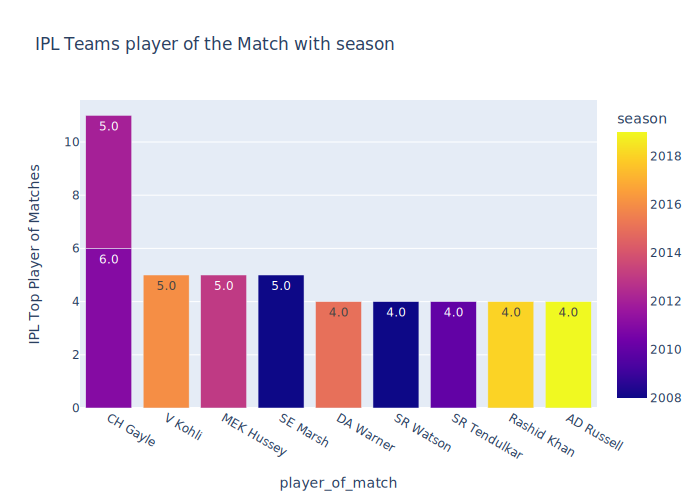

In [47]:
# top 5 players of the match
top_playmatch=dfm.groupby(['player_of_match','season']).apply(lambda x:x['player_of_match'].count()).reset_index(name="IPL Top Player of Matches").sort_values(by="IPL Top Player of Matches",ascending=False).head(10)
fig_topp=px.bar(top_playmatch,x="player_of_match",y="IPL Top Player of Matches",color="season",text_auto=".2s",title="IPL Teams player of the Match with season")
fig_topp.show()

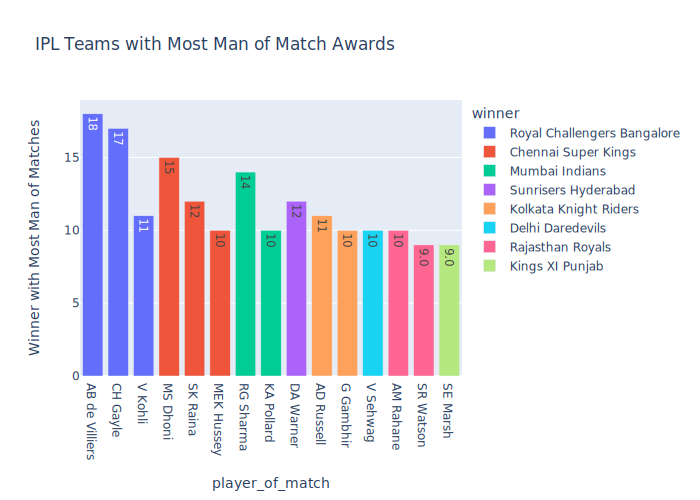

In [48]:
# top 5 players of the match
top_playmatch=dfm.groupby(['player_of_match','winner']).apply(lambda x:x['player_of_match'].count()).reset_index(name="Winner with Most Man of Matches").sort_values(by="Winner with Most Man of Matches",ascending=False).head(15)
fig_topp=px.bar(top_playmatch,x="player_of_match",y="Winner with Most Man of Matches",color="winner",text_auto=".2s",title="IPL Teams with Most Man of Match Awards")
fig_topp.show()

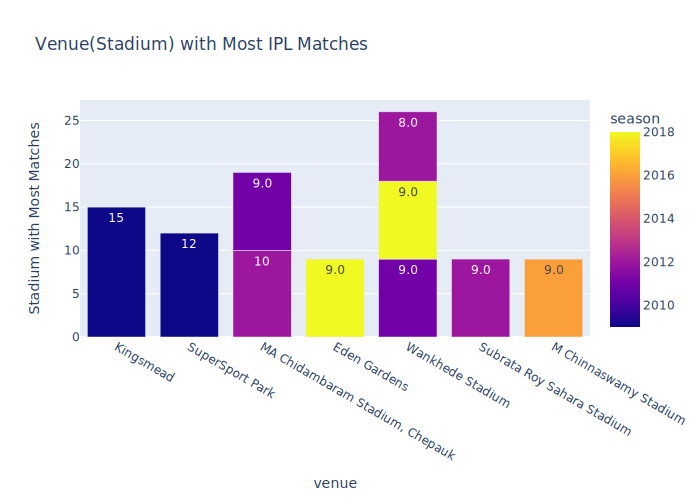

In [49]:
#top 5 players of the match
top_stadium=dfm.groupby(['venue','season']).apply(lambda x:x['venue'].count()).reset_index(name="Stadium with Most Matches").sort_values(by="Stadium with Most Matches",ascending=False).head(10)
figg_topp=px.bar(top_stadium,x="venue",y="Stadium with Most Matches",color="season",text_auto=".2s",title="Venue(Stadium) with Most IPL Matches")
figg_topp.show()

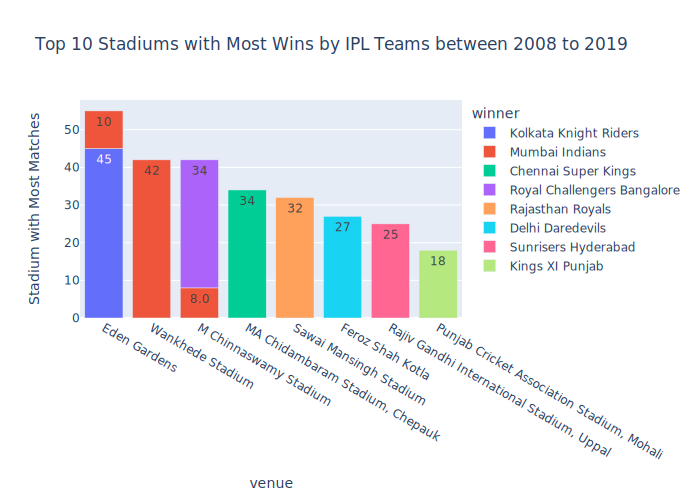

In [50]:
#top 5 players of the match
top_stadium=dfm.groupby(['venue','winner']).apply(lambda x:x['venue'].count()).reset_index(name="Stadium with Most Matches").sort_values(by="Stadium with Most Matches",ascending=False).head(10)
figg_topp=px.bar(top_stadium,x="venue",y="Stadium with Most Matches",color="winner",text_auto=".2s",title="Top 10 Stadiums with Most Wins by IPL Teams between 2008 to 2019")
figg_topp.show()

### Insights from this Exploratory data Analysis on IPL teams